# **Phishing URL detection: clustering synthetic dataset**

**RQ1:** What characteristics provide the greatest discriminatory information for identifying phishing sites compared to legitimate ones?  

**RQ2:** Do synthetic data generated by Large Language Models preserve the same statistical properties as real data?

**RQ3:** What are the main differences between synthetic data generated by LLMs and real data in regression and clustering contexts?

**RQ4:** Can the features generated by LLMs be mapped to known statistical distributions?

<br>

**Author:** Raffaele Aurucci

## **Reading filtered dataset**

In [1]:
download.file("https://drive.google.com/uc?id=1Sd9obB-lHiCWhDgXsmR6rtXpeupCnWYX&export=download", "Phishing_URL_Synthetic_Dataset_3_Filtered.csv")

In [2]:
df <- read.csv('Phishing_URL_Synthetic_Dataset_3_Filtered.csv', sep = ",")

In [3]:
str(df)

'data.frame':	10124 obs. of  21 variables:
 $ URLLength            : int  45 60 28 75 90 55 42 100 39 62 ...
 $ DomainLength         : int  25 30 18 40 50 35 22 60 27 33 ...
 $ TLDEncoding          : num  0.32 0.2 0.4 0.1 0.25 0.35 0.3 0.15 0.38 0.27 ...
 $ NoOfLettersInURL     : int  30 35 12 45 40 28 20 50 15 32 ...
 $ NoOfDigitsInURL      : int  4 5 2 10 6 4 2 8 3 5 ...
 $ NoOfSpecialCharsInURL: int  5 4 1 6 2 3 2 8 2 5 ...
 $ IsHTTPS              : int  0 0 0 0 0 0 0 0 1 0 ...
 $ LineOfCode           : int  300 210 100 400 150 320 250 500 80 90 ...
 $ LargestLineLength    : int  2000 1800 1500 3000 2500 2200 1000 4500 900 2000 ...
 $ HasTitle             : int  0 0 1 0 1 0 0 0 0 0 ...
 $ NoOfReference        : int  5 2 8 0 3 4 2 10 1 0 ...
 $ DomainTitleMatchScore: num  10.5 0 15 0 5.5 20 0 25.4 10 0 ...
 $ URLTitleMatchScore   : num  25.4 0 22 0 10.2 35.7 0 30.1 12 0 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 0 0 0 0 ...
 

In [4]:
set.seed(42)

In [5]:
if (!require(ggplot2)) install.packages('ggplot2')
library(ggplot2)

Loading required package: ggplot2



## **Distance Matrix**

In [6]:
if(!require(cluster)) install.packages('cluster')

library(cluster)

Loading required package: cluster



### Z-score normalization

In [15]:
df_X <- df[, -ncol(df)]

# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20)

df_to_scale <- df_X[, -exclude_columns]

df_scaled <- scale(df_to_scale)

# Combined binary and continuous fratures
df_normalized <- cbind(df_scaled, df_X[, exclude_columns])

# Converting in data frame
df_X <- as.data.frame(df_normalized)

The **Gower Method** is a technique used to compute the distance matrix of a dataset, which can handle mixed types of variables (e.g., numerical and categorical data).

In [16]:
# Convert in factors binary features
df_X[c(13:20)] <- lapply(df_X[c(13:20)], as.factor)

# Compute distance matrix with 'gower' method
distance_matrix <- daisy(df_X, metric = "gower")

## **Total Non-Homogeneity Matrix**

### The statistical measure of heterogeneity (**trace**) is calculated to assess how homogeneous the data are.

In [17]:
# Substitue factors in numeric features
df_X[c(13:20)] <- df[, c(7, 10, 14, 15, 16, 18, 19, 20)]

# Variance/covariance matrix
WI <- cov(df_X)

n <- nrow(df_X)

# Non-Homogeneity Matrix
HI <- (n-1)*WI

trHI <- sum(diag(HI))
trHI

[1] 140891.4

## **Hierarchical Clustering: Complete Linkage**

In [18]:
hls <- hclust(distance_matrix, method = "complete")
str(hls)

List of 7
 $ merge      : int [1:10123, 1:2] -1916 -1945 -2046 -2054 -2064 -2067 -2137 -2210 -2215 -2281 ...
 $ height     : num [1:10123] 1.08e-06 1.08e-06 1.08e-06 1.08e-06 1.08e-06 ...
 $ order      : int [1:10124] 4546 7955 7956 7954 7952 7953 7963 7961 7962 7959 ...
 $ labels     : NULL
 $ method     : chr "complete"
 $ call       : language hclust(d = distance_matrix, method = "complete")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

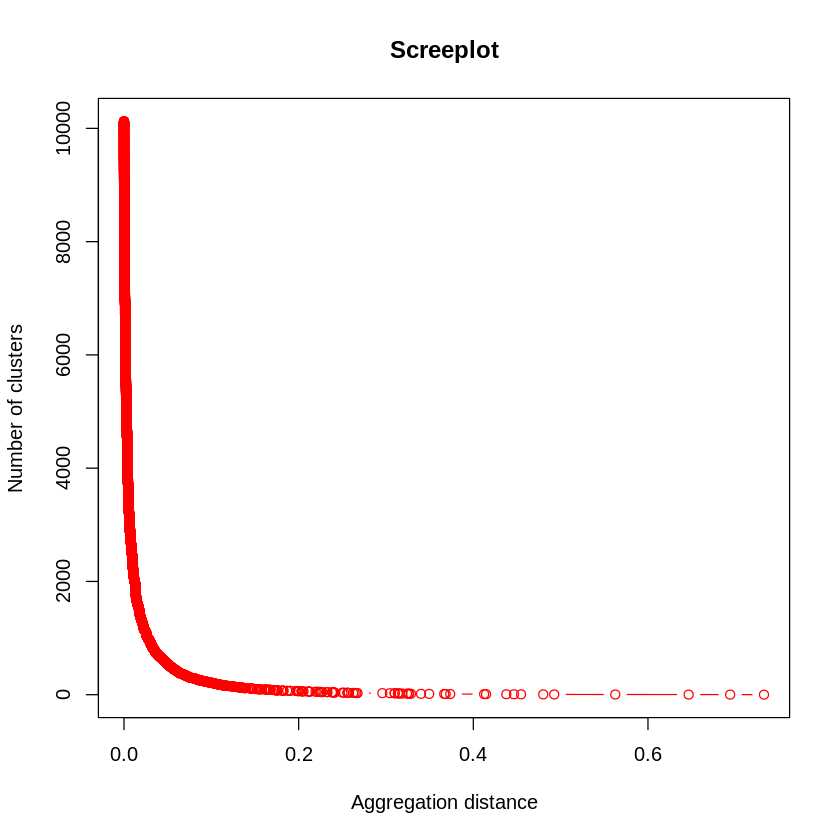

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(10124,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [19]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
   1    2 
5072 5052 

In [20]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

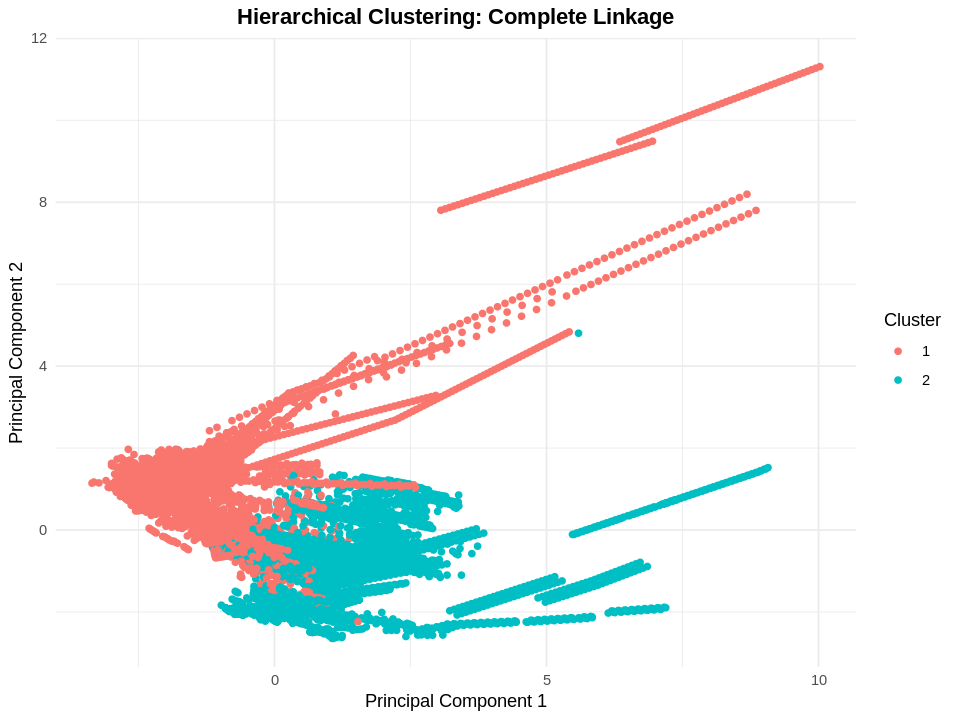

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Hierarchical Clustering: Complete Linkage") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 113016.49713174"

[1] "Between 0.197846469384724"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     4447        625
  2      615       4437

### Silhouette Method

In [25]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
   1    2 
5072 5052 
k = 2 - Silhouette mean: 0.5462061 

cut
   1    2    3 
4837 5052  235 
k = 3 - Silhouette mean: 0.4522099 

cut
   1    2    3    4 
4837 3319 1733  235 
k = 4 - Silhouette mean: 0.4888051 

cut
   1    2    3    4    5 
3995  842 3319 1733  235 
k = 5 - Silhouette mean: 0.5143692 

cut
   1    2    3    4    5    6 
3995  794 3319 1733   48  235 
k = 6 - Silhouette mean: 0.4950004 

cut
   1    2    3    4    5    6    7 
3995  794 3319  915  818   48  235 
k = 7 - Silhouette mean: 0.534177 

cut
   1    2    3    4    5    6    7    8 
3752  794 3319  243  915  818   48  235 
k = 8 - Silhouette mean: 0.5433031 

cut
   1    2    3    4    5    6    7    8    9 
3752  320 3319  243  474  915  818   48  235 
k = 9 - Silhouette mean: 0.5414176 

cut
   1    2    3    4    5    6    7    8    9   10 
3752  320 3319  229  474  915  818   48   14  235 
k = 10 - Silhouette mean: 0.5314389 

[1] 0.5462061 0.4522099 0.4888051 0.5143692 0.4950004 0.5341770 0.5433031

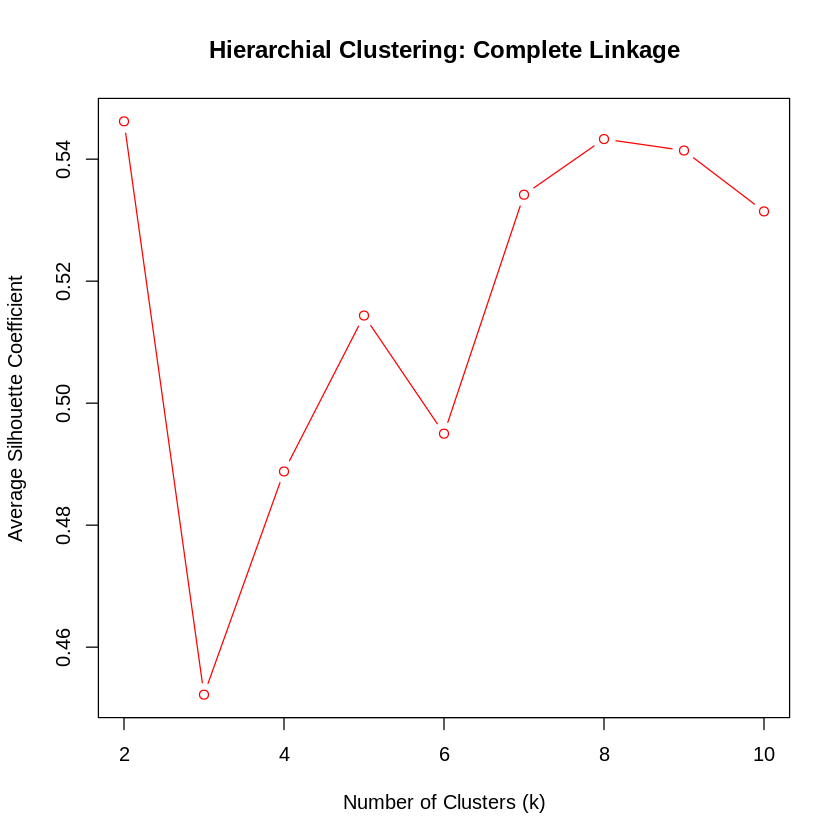

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "Hierarchial Clustering: Complete Linkage")

## **Hierarchical Clustering: Centroid Linkage**

In [27]:
# Squared of distance matrix
d2 <- distance_matrix^2

hls <- hclust(d2, method = "centroid")

str(hls)

List of 7
 $ merge      : int [1:10123, 1:2] -1916 -1945 -2046 -2054 -2064 -2067 -2137 -2210 -2215 -2281 ...
 $ height     : num [1:10123] 1.16e-12 1.16e-12 1.16e-12 1.16e-12 1.16e-12 ...
 $ order      : int [1:10124] 8040 8060 4896 8030 8050 7894 7890 7892 7888 7884 ...
 $ labels     : NULL
 $ method     : chr "centroid"
 $ call       : language hclust(d = d2, method = "centroid")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

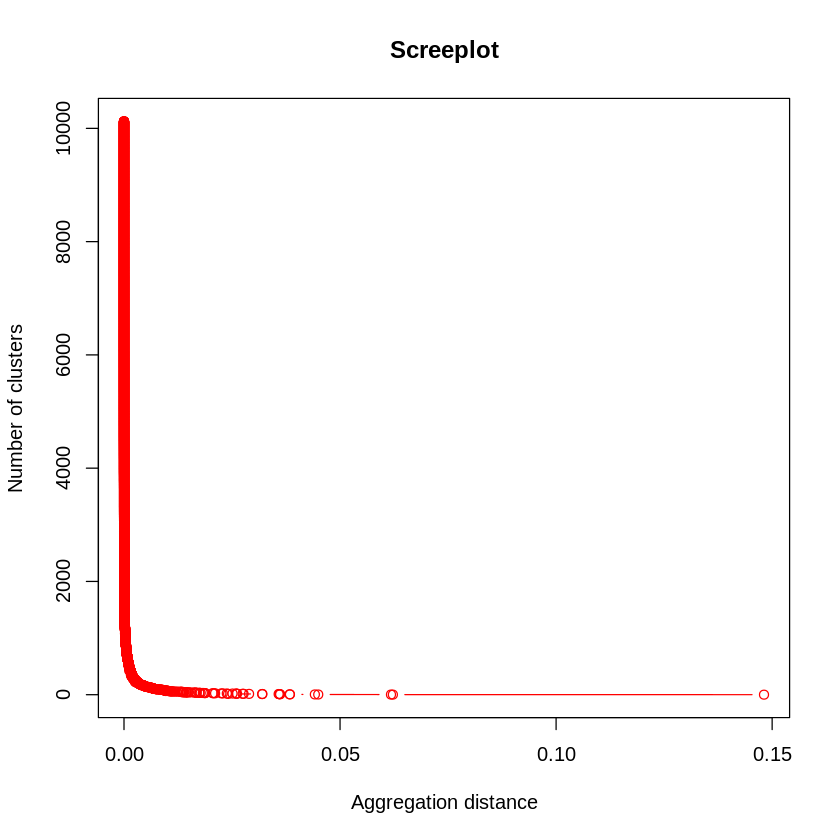

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(10124,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [28]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
   1    2 
4371 5753 

In [29]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

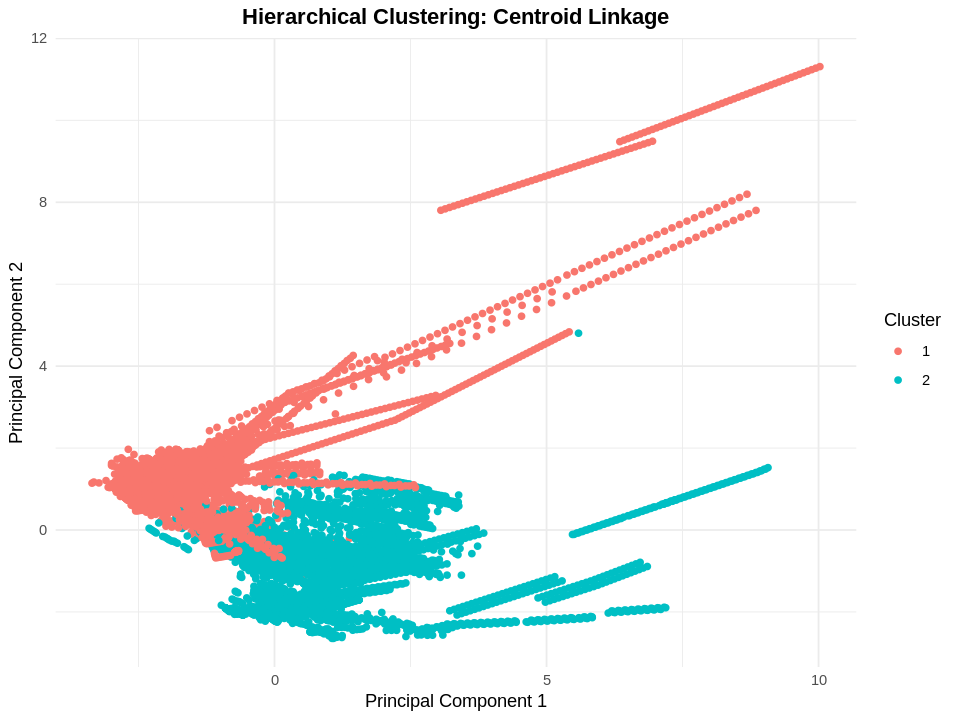

In [30]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Hierarchical Clustering: Centroid Linkage") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 109309.157219451"

[1] "Between 0.224159935783943"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     4310         61
  2      752       5001

### Silhouette Method

In [31]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
   1    2 
4371 5753 
k = 2 - Silhouette mean: 0.5853584 

cut
   1    2    3 
4371 3349 2404 
k = 3 - Silhouette mean: 0.5972438 

cut
   1    2    3    4 
4366 3349 2404    5 
k = 4 - Silhouette mean: 0.548407 

cut
   1    2    3    4    5 
4366 3349 1115 1289    5 
k = 5 - Silhouette mean: 0.5743436 

cut
   1    2    3    4    5    6 
4295 3349 1115 1289    5   71 
k = 6 - Silhouette mean: 0.5483875 

cut
   1    2    3    4    5    6    7 
4295 3349 1115 1286    5    3   71 
k = 7 - Silhouette mean: 0.5208239 

cut
   1    2    3    4    5    6    7    8 
4102 3349 1115 1286    5    3   71  193 
k = 8 - Silhouette mean: 0.53188 

cut
   1    2    3    4    5    6    7    8    9 
4102 3349 1115  426  860    5    3   71  193 
k = 9 - Silhouette mean: 0.5438545 

cut
   1    2    3    4    5    6    7    8    9   10 
4102 3349 1114  426  860    5    3    1   71  193 
k = 10 - Silhouette mean: 0.5294689 

[1] 0.5853584 0.5972438 0.5484070 0.5743436 0.5483875 0.5208239 0.5318800
[

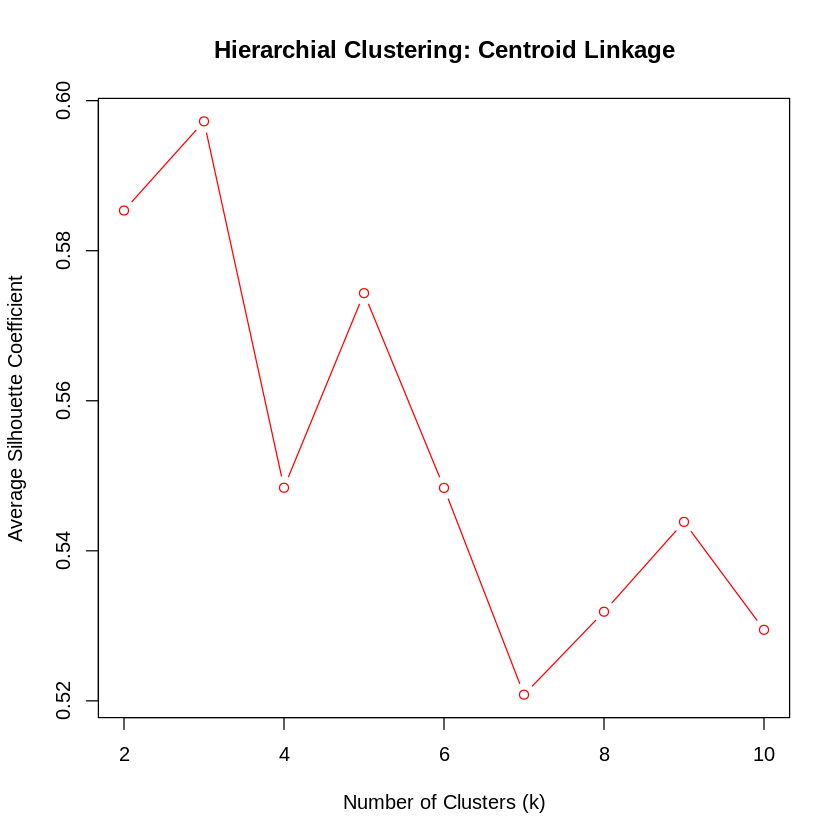

In [32]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "Hierarchial Clustering: Centroid Linkage")

## **Hierarchical Clustering: Average Linkage**

In [33]:
hls <- hclust(distance_matrix, method = "average")
str(hls)

List of 7
 $ merge      : int [1:10123, 1:2] -1916 -1945 -2046 -2054 -2064 -2067 -2137 -2210 -2215 -2281 ...
 $ height     : num [1:10123] 1.08e-06 1.08e-06 1.08e-06 1.08e-06 1.08e-06 ...
 $ order      : int [1:10124] 7912 7908 7910 7906 7902 7904 7900 7896 7898 7810 ...
 $ labels     : NULL
 $ method     : chr "average"
 $ call       : language hclust(d = distance_matrix, method = "average")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

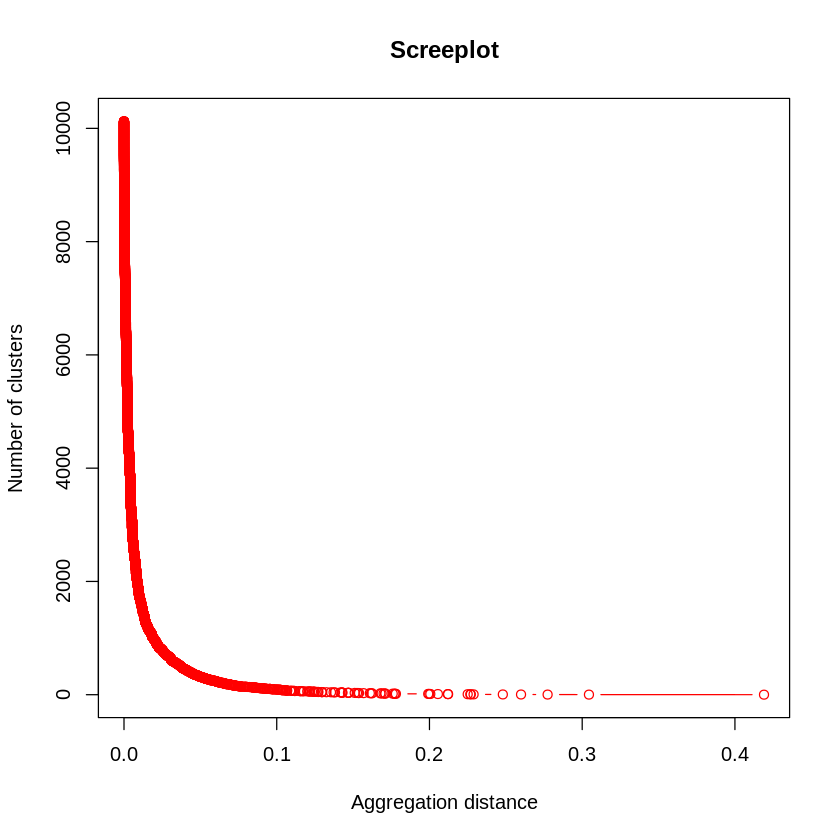

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(10124,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [34]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
   1    2 
4304 5820 

In [35]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

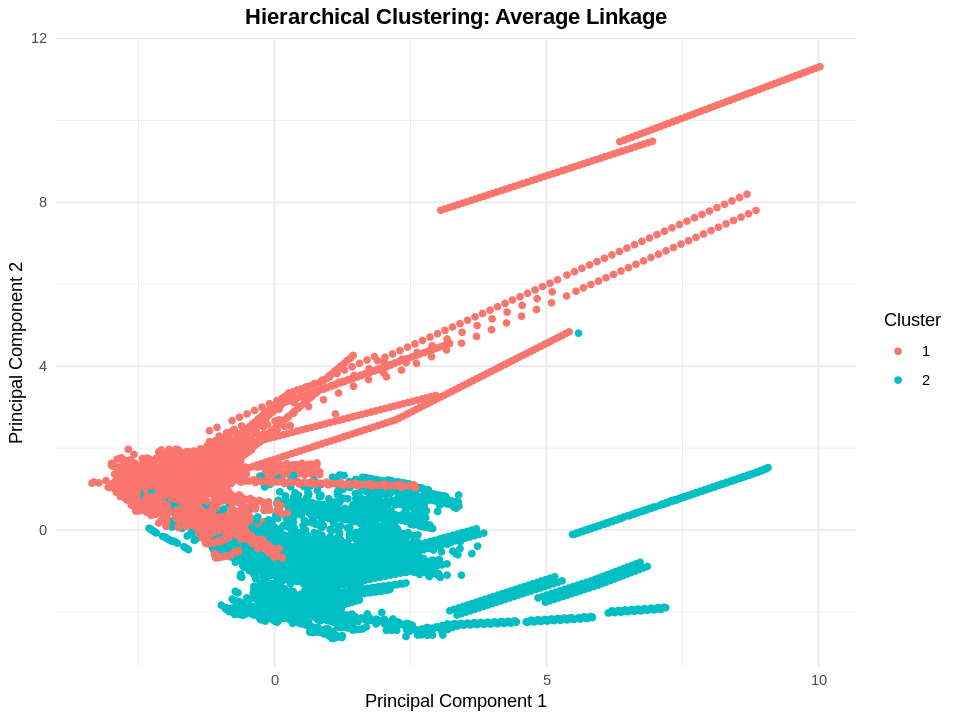

In [36]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Hierarchical Clustering: Average Linkage") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 109472.955627033"

[1] "Between 0.222997349132561"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     4282         22
  2      780       5040

### Silhouette Method

In [37]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
   1    2 
4304 5820 
k = 2 - Silhouette mean: 0.5809885 

cut
   1    2    3 
4304 2471 3349 
k = 3 - Silhouette mean: 0.5949132 

cut
   1    2    3    4 
4304 1607 3349  864 
k = 4 - Silhouette mean: 0.6092736 

cut
   1    2    3    4    5 
4296 1607 3349  864    8 
k = 5 - Silhouette mean: 0.5762429 

cut
   1    2    3    4    5    6 
4296 1192 3349  415  864    8 
k = 6 - Silhouette mean: 0.5745892 

cut
   1    2    3    4    5    6    7 
4296 1192 3349  415  864    5    3 
k = 7 - Silhouette mean: 0.5648856 

cut
   1    2    3    4    5    6    7    8 
4225 1192 3349  415  864    5   71    3 
k = 8 - Silhouette mean: 0.5456642 

cut
   1    2    3    4    5    6    7    8    9 
4225  192 3349  415 1000  864    5   71    3 
k = 9 - Silhouette mean: 0.547251 

cut
   1    2    3    4    5    6    7    8    9   10 
4225  192 3349  415 1000  861    5    3   71    3 
k = 10 - Silhouette mean: 0.5330074 

[1] 0.5809885 0.5949132 0.6092736 0.5762429 0.5745892 0.5648856 0.5456642

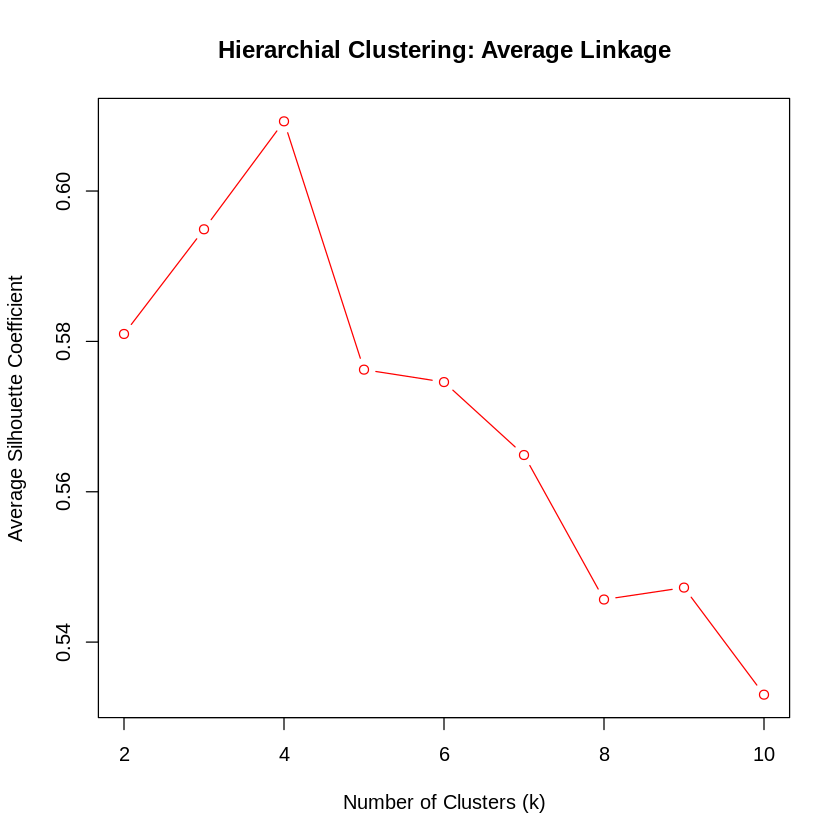

In [38]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "Hierarchial Clustering: Average Linkage")

## **Hierarchical Clustering: Median Linkage**

In [42]:
# Squared of distance matrix
d2 <- distance_matrix^2

hls <- hclust(d2, method = "median")
str(hls)

List of 7
 $ merge      : int [1:10123, 1:2] -1916 -1945 -2046 -2054 -2064 -2067 -2137 -2210 -2215 -2281 ...
 $ height     : num [1:10123] 1.16e-12 1.16e-12 1.16e-12 1.16e-12 1.16e-12 ...
 $ order      : int [1:10124] 7888 7884 7886 7894 7890 7892 7912 7908 7910 7906 ...
 $ labels     : NULL
 $ method     : chr "median"
 $ call       : language hclust(d = d2, method = "median")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

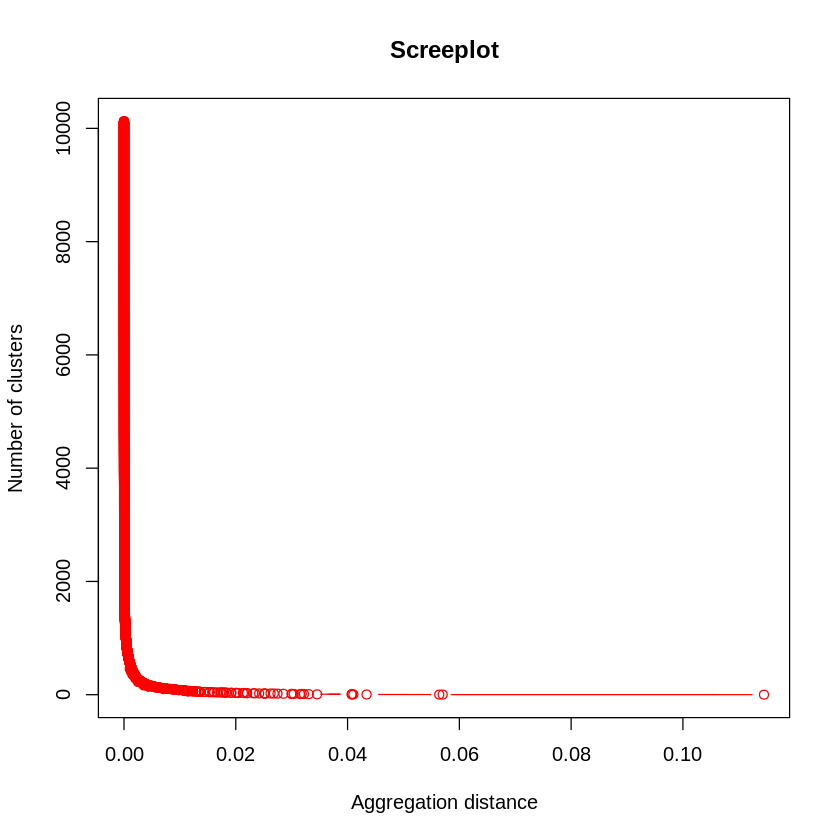

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(10124,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [43]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
   1    2 
9937  187 

In [44]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

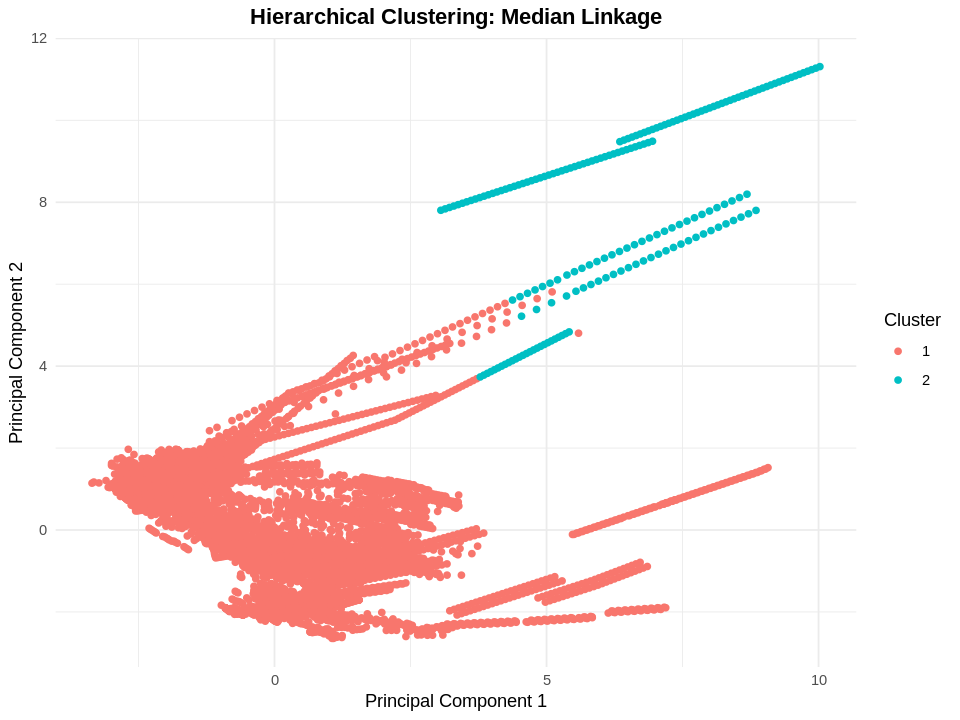

In [45]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Hierarchical Clustering: Median Linkage") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 118069.852371226"

[1] "Between 0.161979433600715"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     4875       5062
  2      187          0

### Silhouette Method

In [46]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
   1    2 
9937  187 
k = 2 - Silhouette mean: 0.1897577 

cut
   1    2    3 
5079 4858  187 
k = 3 - Silhouette mean: 0.4481944 

cut
   1    2    3    4 
5079 3433 1425  187 
k = 4 - Silhouette mean: 0.4706298 

cut
   1    2    3    4    5 
5079 3371 1425   62  187 
k = 5 - Silhouette mean: 0.4264837 

cut
   1    2    3    4    5    6 
5079 3371 1425   48  187   14 
k = 6 - Silhouette mean: 0.3872572 

cut
   1    2    3    4    5    6    7 
4265 3371 1425   48  814  187   14 
k = 7 - Silhouette mean: 0.493373 

cut
   1    2    3    4    5    6    7    8 
4246 3371 1425   48  814   19  187   14 
k = 8 - Silhouette mean: 0.4630785 

cut
   1    2    3    4    5    6    7    8    9 
4141 3371 1425   48  105  814   19  187   14 
k = 9 - Silhouette mean: 0.4239176 

cut
   1    2    3    4    5    6    7    8    9   10 
4141 3371 1425   48  105  814   19   29  158   14 
k = 10 - Silhouette mean: 0.423092 

[1] 0.1897577 0.4481944 0.4706298 0.4264837 0.3872572 0.4933730 0.4630785


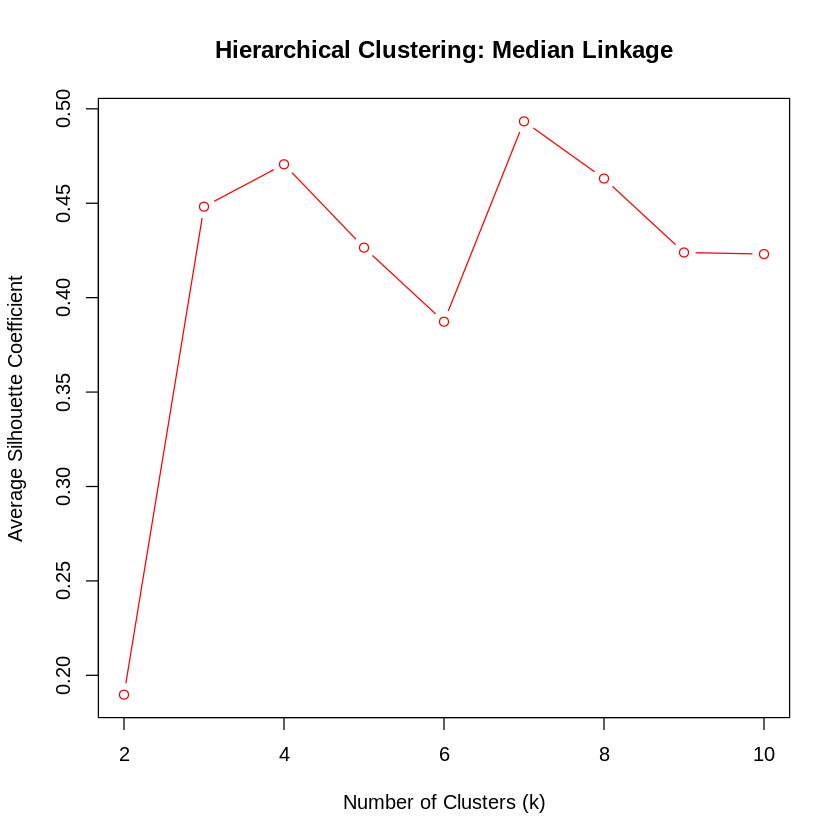

In [47]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "Hierarchical Clustering: Median Linkage")

## **Hierarchical Clustering: Single Linkage**

In [56]:
hls <- hclust(distance_matrix, method = "single")
str(hls)

List of 7
 $ merge      : int [1:10123, 1:2] -1916 -1945 -2046 -2054 -2064 -2067 -2137 -2210 -2215 -2281 ...
 $ height     : num [1:10123] 1.08e-06 1.08e-06 1.08e-06 1.08e-06 1.08e-06 ...
 $ order      : int [1:10124] 9240 9241 9242 9243 9244 9245 9235 9234 9232 9233 ...
 $ labels     : NULL
 $ method     : chr "single"
 $ call       : language hclust(d = distance_matrix, method = "single")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

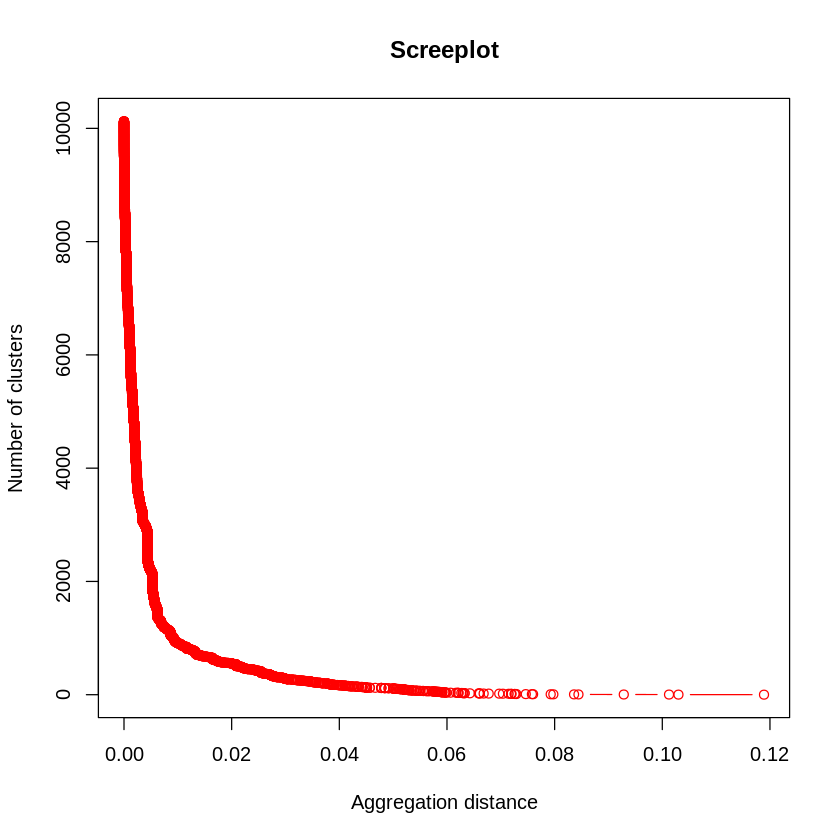

In [57]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(10124,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [58]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
10024   100 

In [59]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

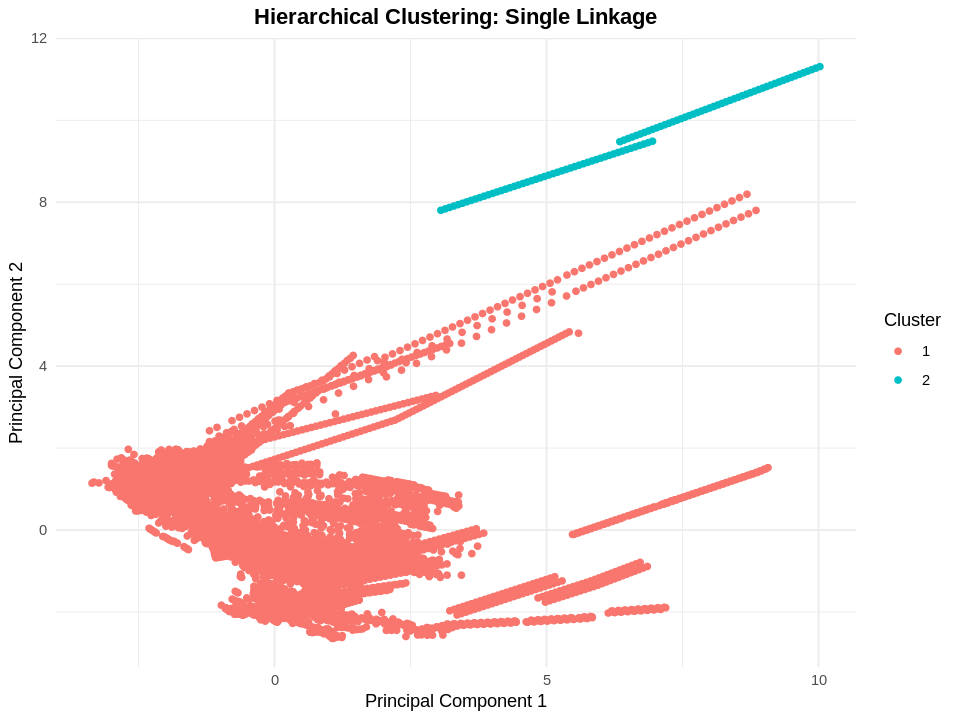

In [60]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Hierarchical Clustering: Single Linkage") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [61]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 122744.914761056"

[1] "Between 0.128797394721231"

In [62]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     4962       5062
  2      100          0

### Silhouette Method

In [63]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
10024   100 
k = 2 - Silhouette mean: 0.1963752 

cut
    1     2     3 
10021     3   100 
k = 3 - Silhouette mean: -0.03567241 

cut
    1     2     3     4 
10020     1     3   100 
k = 4 - Silhouette mean: -0.1822068 

cut
    1     2     3     4     5 
10019     1     1     3   100 
k = 5 - Silhouette mean: -0.2361841 

cut
    1     2     3     4     5     6 
10018     1     1     1     3   100 
k = 6 - Silhouette mean: -0.3197563 

cut
    1     2     3     4     5     6     7 
10017     1     1     1     1     3   100 
k = 7 - Silhouette mean: -0.3343884 

cut
    1     2     3     4     5     6     7     8 
10016     1     1     1     1     1     3   100 
k = 8 - Silhouette mean: -0.3839274 

cut
    1     2     3     4     5     6     7     8     9 
10013     1     1     1     1     3     1     3   100 
k = 9 - Silhouette mean: -0.3892239 

cut
    1     2     3     4     5     6     7     8     9    10 
10012     1     1     1     1     3     1     1     3  

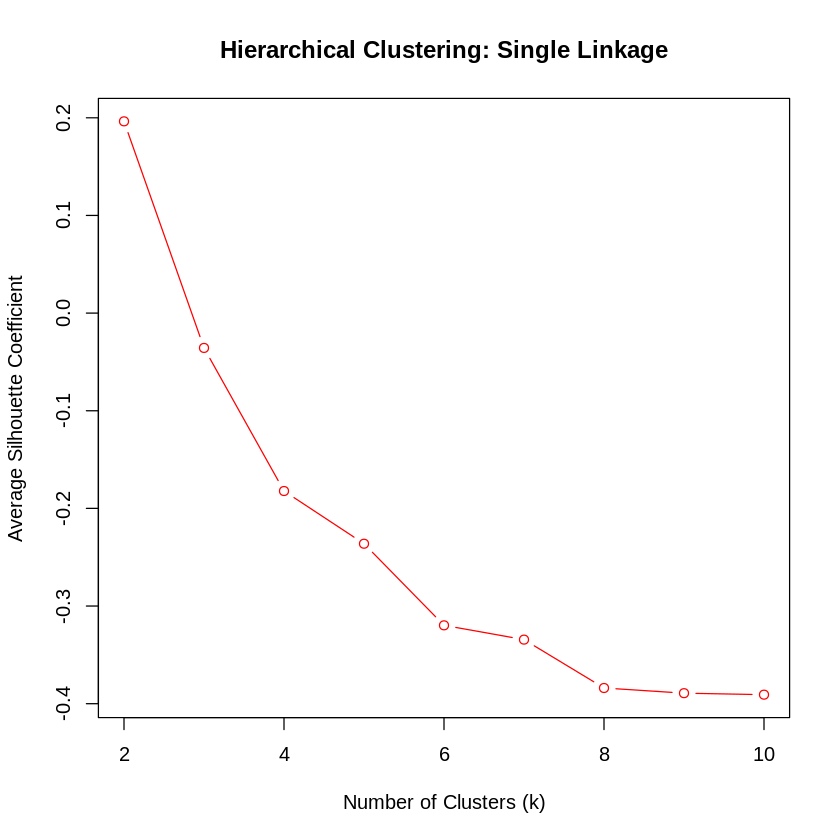

In [64]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "Hierarchical Clustering: Single Linkage")

## **K-Means: hierarchical clustering initialization**

In [72]:
d2 = distance_matrix ^ 2

hls <- hclust(d2, method = "centroid")
cut <- cutree(hls, k = 2)

cut_list <- list(cut)

# Centroids
centroids <- aggregate(df_X, cut_list, mean)
centroids <- centroids[, -1]

In [73]:
# k-means
km <- kmeans (df_X, centers = centroids, iter.max = 100)

In [74]:
# Calculate the statistical heterogeneity measure
print(paste("Statistical heterogeneity measure: ", km$betweenss / km$totss))

# Calculate the total heterogeneity measure
print(paste("Total heterogeneity measure: ", km$totss))

# Calculate the sum of the within-cluster variance
print(paste("Sum of within-cluster variance: ", km$tot.withinss))

# Calculate the between-cluster variance
print(paste("Between-cluster variance: ", km$betweenss))

[1] "Statistical heterogeneity measure:  0.241764702785678"
[1] "Total heterogeneity measure:  143367.384136705"
[1] "Sum of within-cluster variance:  108706.211121734"
[1] "Between-cluster variance:  34661.1730149705"


In [75]:
df_X$cluster <- km$cluster

# Create a contingency table between the cluster and the label
contingency_table <- table(df_X$cluster, df$label)

# Rename columns
colnames(contingency_table) <- c("phishing", "legitimate")

print("Contingency table between cluster and label:")
print(contingency_table)

[1] "Contingency table between cluster and label:"
   
    phishing legitimate
  1     4246         70
  2      816       4992


In [76]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X[, -ncol(df_X)], scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     2.0350 1.8859 1.5048 1.08716 0.82593 0.7273 0.70899
Proportion of Variance 0.2975 0.2555 0.1627 0.08492 0.04901 0.0380 0.03612
Cumulative Proportion  0.2975 0.5531 0.7158 0.80072 0.84973 0.8877 0.92385
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.46190 0.4053 0.37596 0.36214 0.34152 0.25605 0.24999
Proportion of Variance 0.01533 0.0118 0.01016 0.00942 0.00838 0.00471 0.00449
Cumulative Proportion  0.93918 0.9510 0.96114 0.97057 0.97895 0.98366 0.98815
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.23092 0.19775 0.16775 0.14357 0.13048 0.08231
Proportion of Variance 0.00383 0.00281 0.00202 0.00148 0.00122 0.00049
Cumulative Proportion  0.99198 0.99479 0.99681 0.99829 0.99951 1.00000

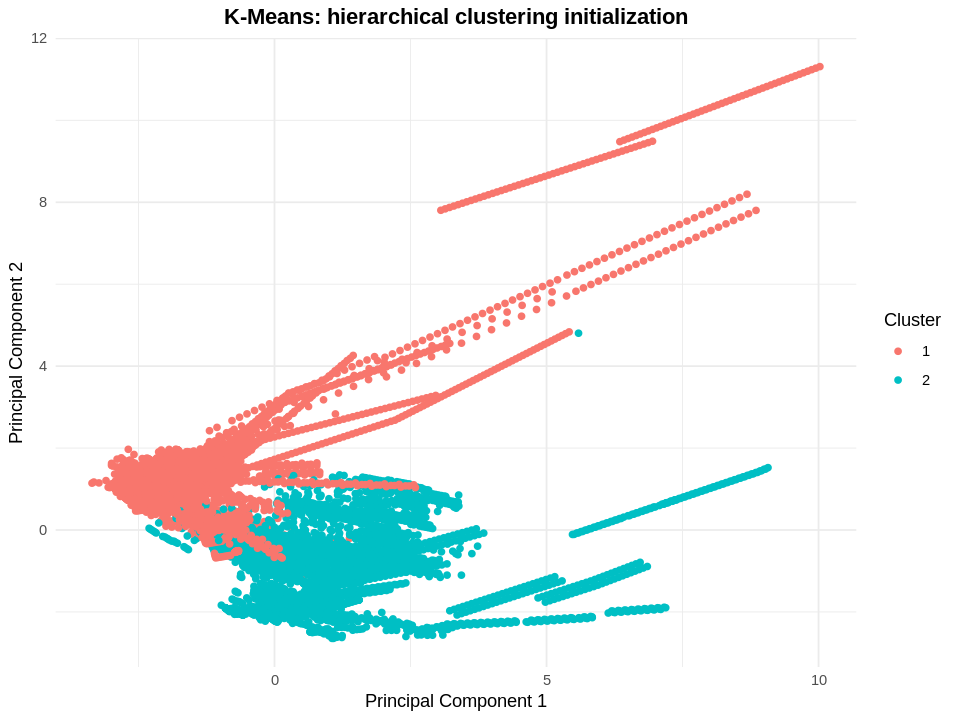

In [77]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "K-Means: hierarchical clustering initialization") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

### Silhouette Method

In [78]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()


for (k in 2:10) {

  # Perform K-Means clustering with 'k' clusters
  if (k == 2) {
    km <- kmeans(df_X, centers = centroids, iter.max = 100)
  }
  else {
    km <- kmeans(df_X, centers = k, nstart = 25, iter.max = 100)
  }

  clusters <- km$cluster

  # Count num of element in each cluster
  num <- table(clusters)
  print(num)

  # Mean silhouette's coefficients
  sil <- silhouette(clusters, distance_matrix)

  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

# Print the mean silhouette scores for k = 2 to 10
print(silhouette_means[2:10])

clusters
   1    2 
4316 5808 
k = 2 - Silhouette mean: 0.5673552 

clusters
   1    2    3 
 403 4019 5702 
k = 3 - Silhouette mean: 0.5149355 

clusters
   1    2    3    4 
 401 3963 1696 4064 
k = 4 - Silhouette mean: 0.5298298 

clusters
   1    2    3    4    5 
 324  230 1683 4112 3775 
k = 5 - Silhouette mean: 0.408894 

clusters
   1    2    3    4    5    6 
 324  230 4104 3617 1299  550 
k = 6 - Silhouette mean: 0.4099904 

clusters
   1    2    3    4    5    6    7 
1290  550  145 3825  476 3529  309 
k = 7 - Silhouette mean: 0.3864987 

clusters
   1    2    3    4    5    6    7    8 
 132 1524 1278  336  306  549 3808 2191 
k = 8 - Silhouette mean: 0.3557842 

clusters
   1    2    3    4    5    6    7    8    9 
1273 2184  101 3809  336  549  132 1488  252 
k = 9 - Silhouette mean: 0.3509849 

clusters
   1    2    3    4    5    6    7    8    9   10 
1272  550 1085  250  100  194 2048 1566 2956  103 
k = 10 - Silhouette mean: 0.2632425 

[1] 0.5673552 0.5149355 0.52

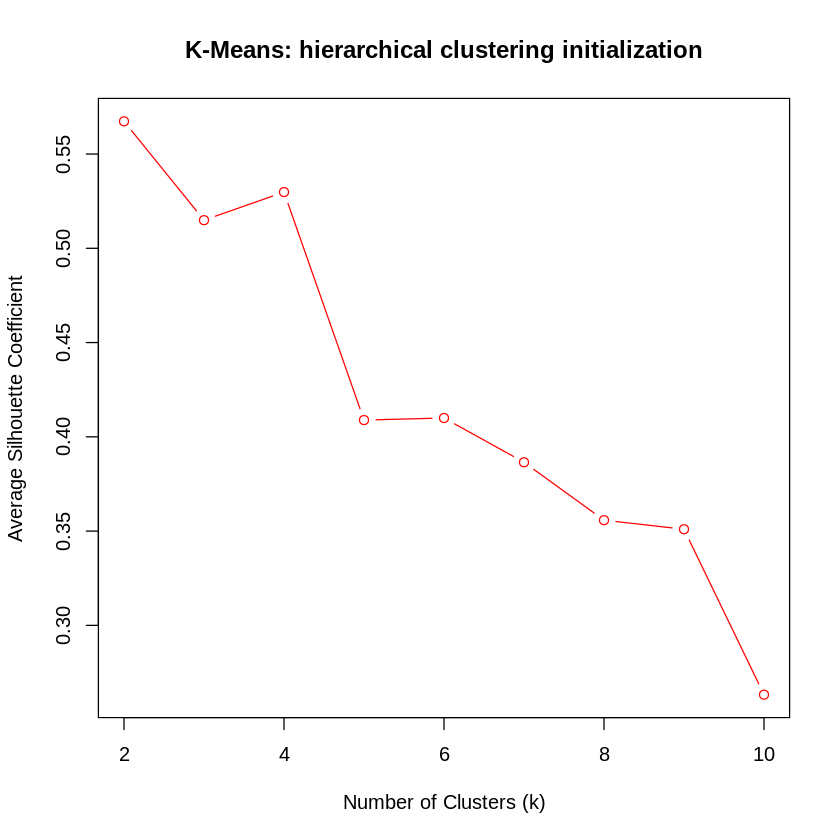

In [79]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red', main = "K-Means: hierarchical clustering initialization")

### Elbow-point

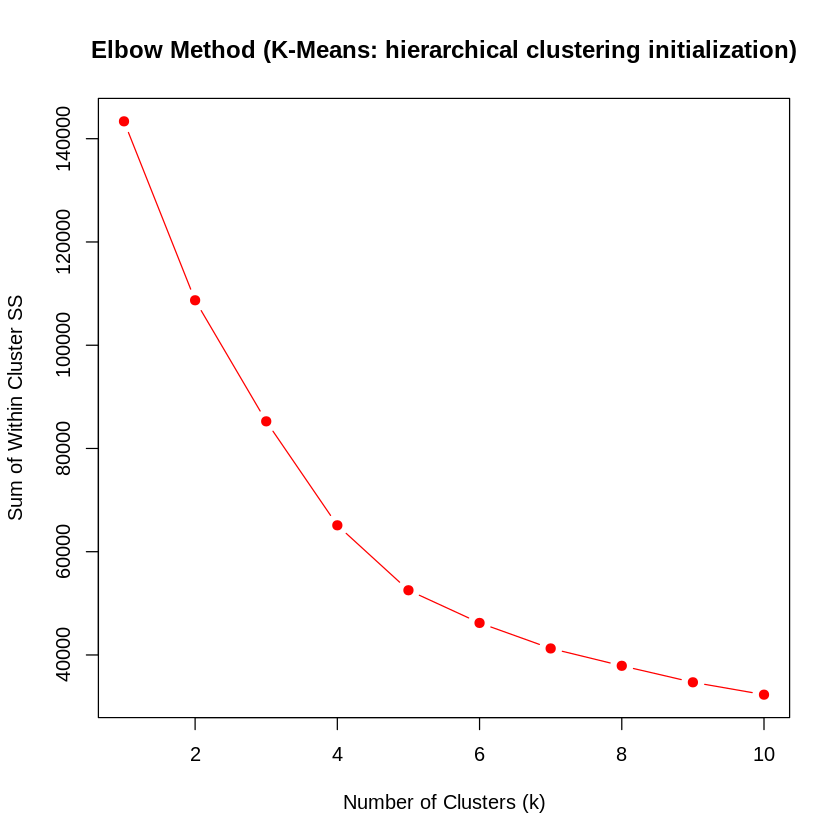

In [80]:
k_values <- 1:10

# Vector to store the WSS for each k
wss_values <- numeric(length(k_values))

# Calculate K-means for each k value
for (k in k_values) {
  if (k == 2) {
    km <- kmeans(df_X, centers = centroids, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }
  else {
    km <- kmeans(df_X, centers = k, nstart = 25, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }
}

# Plot the Elbow Method graph
plot(k_values, wss_values, type = "b", pch = 19, col = "red",
     xlab = "Number of Clusters (k)", ylab = "Sum of Within Cluster SS",
     main = "Elbow Method (K-Means: hierarchical clustering initialization)")